In [38]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
using YAXArrays
using Zarr
using Dates
include("src/rainforest_lib.jl")
using .Rainforestlib


  Activating project at `~/workspace/uni/spatial_temporal_data/spatio_temporal_data-rainforest_development`


In [7]:
lc = Rainforestlib.get_lcc_datacube()


YAXArray with the following dimensions
lon                 Axis with 32400 Elements from -179.9986111111111 to 179.9902777777778
lat                 Axis with 16200 Elements from 89.99027777777778 to -89.99861111111112
time                Axis with 11 Elements from 2010-01-01T00:00:00 to 2020-01-01T00:00:00
name: lccs_class
Total size: 5.38 GB


In [8]:
filtered_dc = Rainforestlib.rough_spatial_filter(lc; time_bounds = (Date(2010), Date(2021)))


YAXArray with the following dimensions
lon                 Axis with 5400 Elements from -89.9986111111111 to -30.009722222222205
lat                 Axis with 4050 Elements from 14.990277777777777 to -29.99861111111111
time                Axis with 11 Elements from 2010-01-01T00:00:00 to 2020-01-01T00:00:00
name: lccs_class
Total size: 229.43 MB


In [9]:
include("src/LCCSClasses.jl")
using .LCCSClasses

# set a set of accepted values
rainforest_values = Set(LCCSClasses.categories["rainforest"].lccs_classes)

forest_values = Set(LCCSClasses.categories["forest"].lccs_classes)

all_forest_values = union(forest_values, rainforest_values)

Set{String} with 13 elements:
  "tree_needleleaved_evergreen_open"
  "tree_needleleaved_deciduous_closed"
  "tree_needleleaved_deciduous_open"
  "tree_needleleaved_deciduous_closed_to_open"
  "tree_broadleaved_deciduous_open"
  "tree_broadleaved_deciduous_closed"
  "tree_broadleaved_evergreen_closed_to_open"
  "tree_cover_flooded_saline_water"
  "tree_needleleaved_evergreen_closed"
  "tree_mixed"
  "tree_broadleaved_deciduous_closed_to_open"
  "tree_cover_flooded_fresh_or_brakish_water"
  "tree_needleleaved_evergreen_closed_to_open"

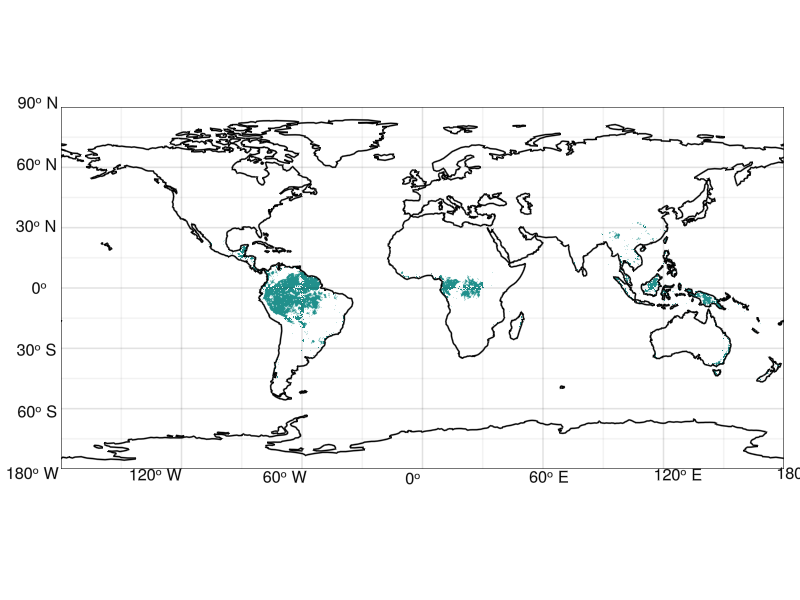

In [9]:
# WARNING: do not try this with the huge datacube, it wont work. The in function needs to be ported to datacubes, the native one is not working
# to create the world map, simply set local_map=false
global_figure = Rainforestlib.build_figure_by_lcc_classes(lc, rainforest_values; local_map = false)

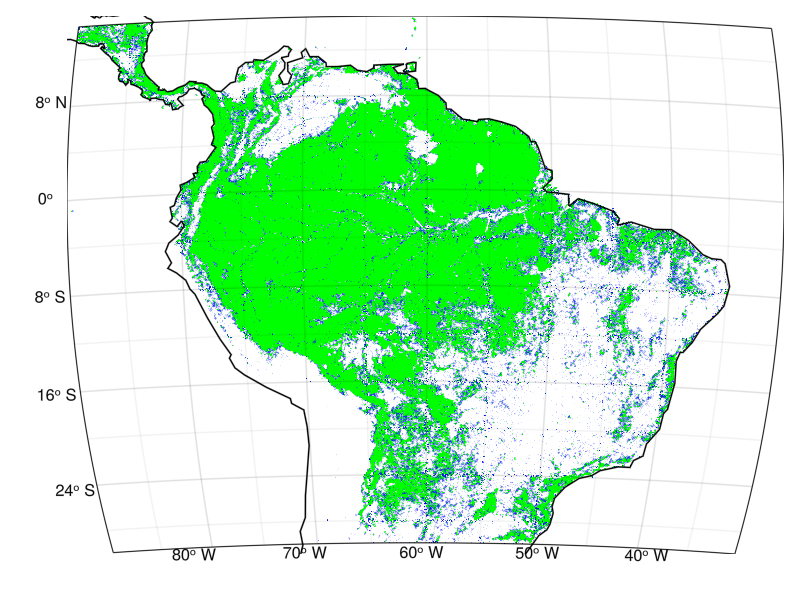

In [15]:
using .Rainforestlib

# local is the default, and makes the map as large as the datapoints
# but can me changed by setting 

using Colors, ColorSchemes

mycmap = ColorScheme([RGB{Float64}(i, 1.5i, 2i) for i in [0.0, 0.25, 0.35, 0.5]])

custom_colormap = [
    RGB(1.0, 1.0, 1.0),  # Red
    RGB(0.0, 0.0, 1.0),  # Blue
    RGB(0.0, 1.0, 0.0)   # Green
]

local_figure = Rainforestlib.build_figure_by_lcc_classes(filtered_dc, all_forest_values; colormap = custom_colormap, colorrange = (0,2))

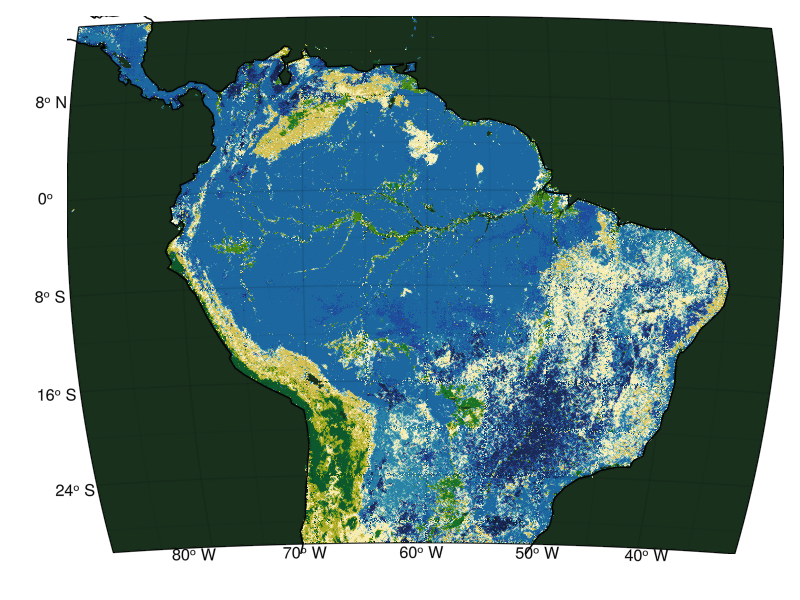

In [8]:
using .Rainforestlib

local_figure = Rainforestlib.build_figure_all_classes(filtered_dc; colormap = :delta)

Number of rainforest pixels in 2010-01-01T00:00:00: 5.297642e6
Diff to last: 5.297642e6


Number of rainforest pixels in 2011-01-01T00:00:00: 5.290655e6
Diff to last: -6987.0


Number of rainforest pixels in 2012-01-01T00:00:00: 5.286826e6
Diff to last: -3829.0


Number of rainforest pixels in 2013-01-01T00:00:00: 5.284368e6
Diff to last: -2458.0


Number of rainforest pixels in 2014-01-01T00:00:00: 5.285446e6
Diff to last: 1078.0


Number of rainforest pixels in 2015-01-01T00:00:00: 5.285433e6
Diff to last: -13.0


Number of rainforest pixels in 2016-01-01T00:00:00: 5.289436e6
Diff to last: 4003.0


Number of rainforest pixels in 2017-01-01T00:00:00: 5.288907e6
Diff to last: -529.0


Number of rainforest pixels in 2018-01-01T00:00:00: 5.283218e6
Diff to last: -5689.0


Number of rainforest pixels in 2019-01-01T00:00:00: 5.282694e6
Diff to last: -524.0


Number of rainforest pixels in 2020-01-01T00:00:00: 5.28329e6
Diff to last: 596.0


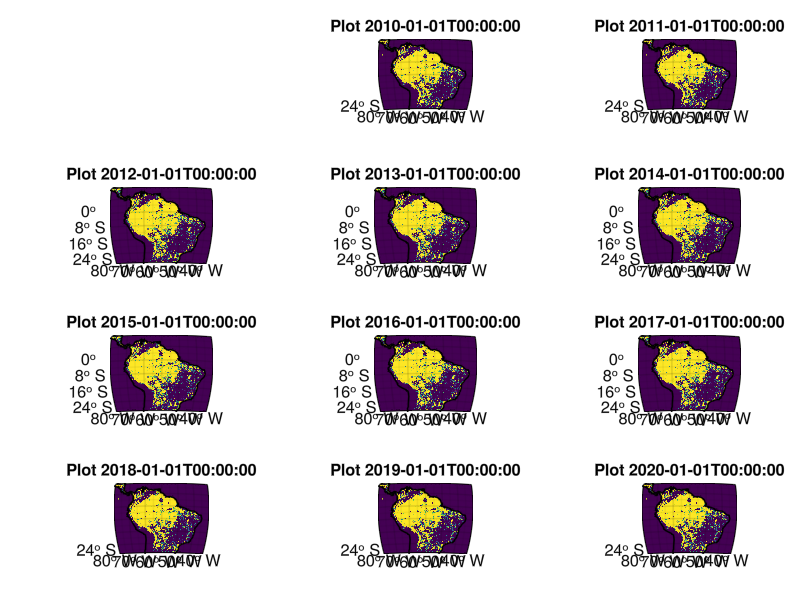

In [38]:
Rainforestlib.build_plots_over_time(filtered_dc, all_forest_values; resolution=(2000, 2000))

In [40]:
# build one figure with diffs for each timestep

using .Rainforestlib
using Colors, ColorSchemes


custom_colormap = [
    RGB(1.0, 1.0, 1.0),  # White
    RGB(0.0, 1.0, 0.0),  # Green
    RGB(0.0, 0.0, 1.0),  # Blue
    RGB(1.0, 0.0, 0.0),  # Red
]



figures = Rainforestlib.build_diff_figures_over_time(filtered_dc, Rainforestlib.LCCSClasses.categories["rainforest"]; colormap = custom_colormap, resolution = (3000, 3000))

Number of rainforest pixels in 2010-01-01T00:00:00: 4614232


Number of rainforest pixels in 2011-01-01T00:00:00: 4611793


Number of rainforest pixels in 2012-01-01T00:00:00: 4611263


Number of rainforest pixels in 2013-01-01T00:00:00: 4610353


Number of rainforest pixels in 2014-01-01T00:00:00: 4613331


Number of rainforest pixels in 2015-01-01T00:00:00: 4613325


Number of rainforest pixels in 2016-01-01T00:00:00: 4615178


Number of rainforest pixels in 2017-01-01T00:00:00: 4614730


Number of rainforest pixels in 2018-01-01T00:00:00: 4613133


Number of rainforest pixels in 2019-01-01T00:00:00: 4614627


Number of rainforest pixels in 2020-01-01T00:00:00: 4615558


11-element Vector{Figure}:
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()
 Figure()

In [41]:
using GLMakie
for (index, figure) in enumerate(figures)
    save("imgs/fig_$(index).png", figure)
end

In [3]:
include("src/categories.jl")
using .RainforestCategories

RainforestCategories.categories

Dict{String, Main.RainforestCategories.Category} with 10 entries:
  "no_data"           => Category("no_data", Set(["no_data"]), 0.5, Set(UInt8[0…
  "water"             => Category("water", Set(["water", "snow_and_ice"]), 0.7,…
  "cropland"          => Category("cropland", Set(["cropland_rainfed", "croplan…
  "shrubland"         => Category("shrubland", Set(["shrubland_evergreen", "shr…
  "forest"            => Category("forest", Set(["tree_needleleaved_evergreen_o…
  "urban"             => Category("urban", Set(["urban"]), 1.0, Set(UInt8[0xbe]…
  "bare_areas"        => Category("bare_areas", Set(["bare_areas_unconsolidated…
  "flat_vegetation"   => Category("flat_vegetation", Set(["grassland", "lichens…
  "sparse_vegetation" => Category("sparse_vegetation", Set(["sparse_shrub", "mo…
  "rainforest"        => Category("rainforest", Set(["tree_broadleaved_evergree…